In [1]:
import torch
import torch.nn.functional as f

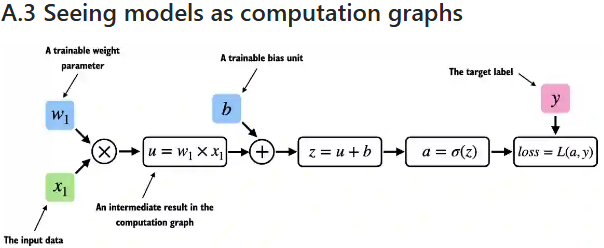

In [7]:
x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2])
b  = torch.tensor([0.0])

y = torch.tensor([1.0])

z = x1*w1 + b
a= torch.sigmoid(z)

loss = f.binary_cross_entropy(a, y)
print(loss)

tensor(0.0852)


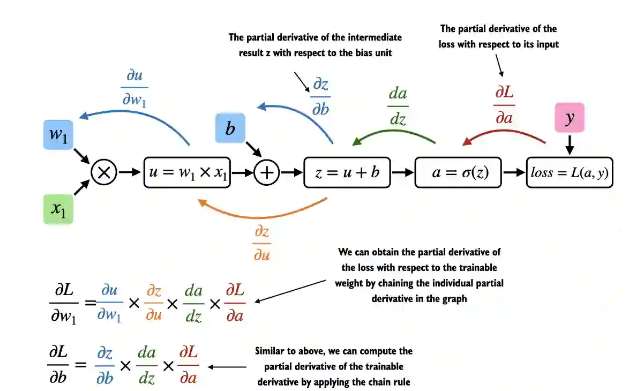

In [9]:
from torch.autograd import grad

x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2], requires_grad=True)
b  = torch.tensor([0.0], requires_grad=True)
y = torch.tensor([1.0])

z = x1*w1 + b
a= torch.sigmoid(z)

loss = f.binary_cross_entropy(a, y)

grad_L_w1 = grad(loss, w1, retain_graph = True)
grad_L_b = grad(loss, b, retain_graph= True)

print(grad_L_w1)
print(grad_L_b)

(tensor([-0.0898]),)
(tensor([-0.0817]),)


In [10]:
loss.backward()

print(w1.grad)
print(b.grad)

tensor([-0.0898])
tensor([-0.0817])


# Multilayer neural network

In [13]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()
        self.layers= torch.nn.Sequential(torch.nn.Linear(num_inputs, 30),torch.nn.ReLU(),
                                         torch.nn.Linear(30,20),torch.nn.ReLU(),
                                         torch.nn.Linear(20, num_outputs) )
    
    def forward(self,x):
        logits = self.layers(x)
        return logits

In [14]:
model = NeuralNetwork(50, 3)
print(model)

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
  )
)


In [19]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total no of trainable model parameters:", num_params)

Total no of trainable model parameters: 2213


In [20]:
print(model.layers[0].weight)

Parameter containing:
tensor([[-0.0958,  0.0602,  0.0021,  ..., -0.1228,  0.1021,  0.1093],
        [ 0.0189, -0.1167,  0.0846,  ...,  0.1388,  0.1365, -0.1243],
        [-0.0927,  0.1229,  0.0308,  ...,  0.1303,  0.0148,  0.1058],
        ...,
        [-0.1326,  0.0113,  0.1360,  ..., -0.1305,  0.0779, -0.1103],
        [ 0.0194,  0.0405,  0.0641,  ...,  0.0175, -0.0363,  0.0532],
        [ 0.1264,  0.0945,  0.0469,  ..., -0.0392,  0.1288, -0.0941]],
       requires_grad=True)


In [21]:
print(model.layers[0].weight.shape)

torch.Size([30, 50])


In [22]:
torch.manual_seed(123)

X = torch.rand((1, 50))
out = model(X)

print(out)

tensor([[ 0.2251, -0.2604, -0.0848]], grad_fn=<AddmmBackward0>)


In PyTorch, when you call model(X), it automatically calls the forward() method behind the scenes. This happens through Python's special method __call__.

In [23]:
with torch.no_grad():
    out=model(X)

print(out)

tensor([[ 0.2251, -0.2604, -0.0848]])


In [24]:
with torch.no_grad():
    out = torch.softmax(model(X), dim=1)

print(out)

tensor([[0.4257, 0.2620, 0.3123]])
